
========== Đang huấn luyện KNN cho nồng độ: 250500 ==========
R^2: 0.8742
MAE: 0.2251
MAPE: 125.02%
RMSE: 0.2985


  File "c:\Users\d5a2m\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\d5a2m\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\d5a2m\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\d5a2m\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


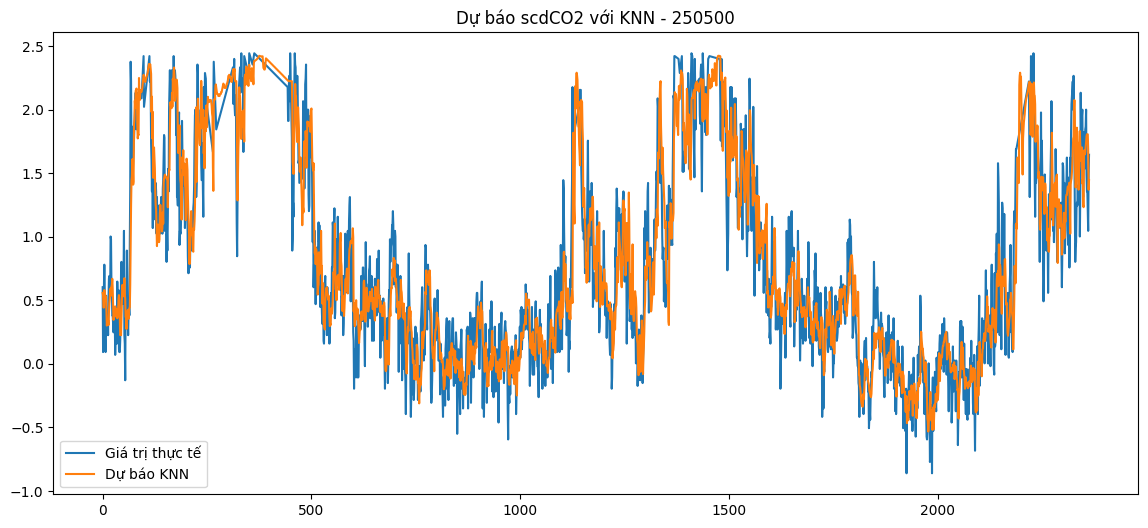


========== Đang huấn luyện KNN cho nồng độ: 500500 ==========
R^2: 0.8980
MAE: 0.2588
MAPE: 775.45%
RMSE: 0.3488


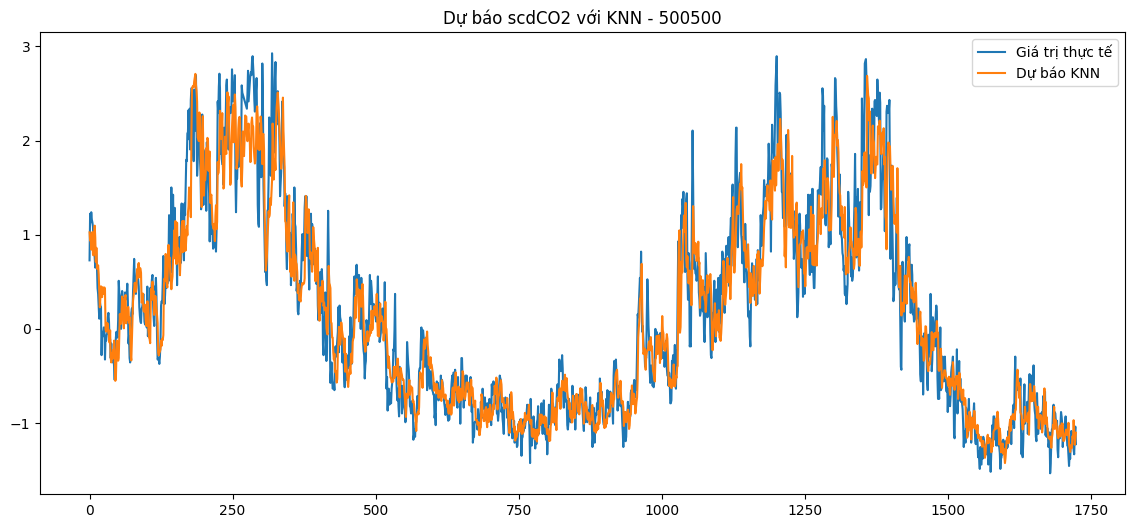


========== Đang huấn luyện KNN cho nồng độ: 750500 ==========
R^2: 0.8914
MAE: 0.2173
MAPE: 163.41%
RMSE: 0.2942


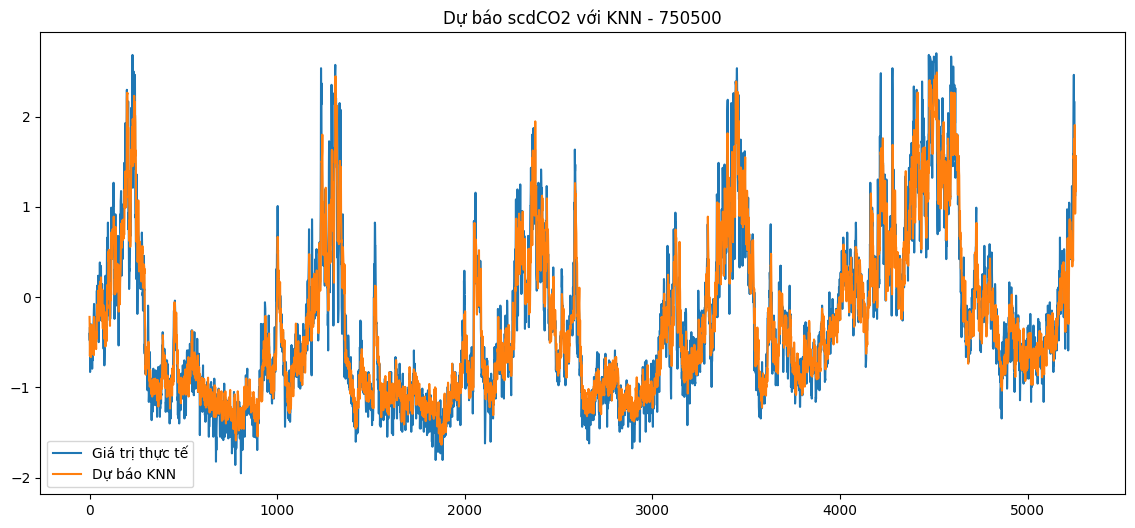


Bảng tổng hợp chỉ số các nồng độ:
  nồng độ        R2       MAE        MAPE      RMSE
0  250500  0.874173  0.225110  125.022078  0.298517
1  500500  0.897992  0.258807  775.450007  0.348828
2  750500  0.891412  0.217317  163.406727  0.294202


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings



# Đường dẫn dữ liệu
base_dir = r'E:\Khóa luận\Data\Phase 2'
concentration_files = {
    '250500': 'preprocessed_250500.csv',
    '500500': 'preprocessed_500500.csv',
    '750500': 'preprocessed_750500.csv'
}

target_col = 'scdCO2'  # Thay đổi nếu muốn dự báo biến khác
window_size = 24

warnings.filterwarnings("ignore", message="Could not find the number of physical cores*")
metrics = []

for label, fname in concentration_files.items():
    print(f'\n========== Đang huấn luyện KNN cho nồng độ: {label} ==========')
    file_path = os.path.join(base_dir, fname)
    df = pd.read_csv(file_path)
    df['Date time'] = pd.to_datetime(df['Date time'])
    df = df.sort_values('Date time').reset_index(drop=True)

    # Tạo đặc trưng window cho KNN (dự báo theo chuỗi)
    values = df[target_col].values
    X, y = [], []
    for i in range(len(values) - window_size):
        X.append(values[i:i+window_size])
        y.append(values[i+window_size])
    X = np.array(X)
    y = np.array(y)

    # Chia train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Huấn luyện mô hình KNN
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)

    # Dự báo
    y_pred = model.predict(X_test)

    # Tính các chỉ số
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'RMSE: {rmse:.4f}')

    metrics.append({
        'nồng độ': label,
        'R2': r2,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse
    })

    # Vẽ biểu đồ so sánh dự báo và thực tế
    plt.figure(figsize=(14,6))
    plt.plot(y_test, label='Giá trị thực tế')
    plt.plot(y_pred, label='Dự báo KNN')
    plt.title(f'Dự báo {target_col} với KNN - {label}')
    plt.legend()
    plt.show()

# Xuất bảng tổng hợp chỉ số
metrics_df = pd.DataFrame(metrics)
print('\nBảng tổng hợp chỉ số các nồng độ:')
print(metrics_df)